In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime, timedelta
from collections import Counter


In [13]:
filename="/content/Cookies" #EDIT ME
connection = sqlite3.connect(filename)
cursor = connection.cursor()
connection.text_factory = lambda x: x.decode(errors = 'ignore')
data = pd.read_sql_query("SELECT * FROM cookies;",connection)
# results = pd.DataFrame.to_csv(cursor.fetchall())

In [17]:
data

,creation_utc,top_frame_site_key,host_key,name,value,encrypted_value,path,expires_utc,is_secure,is_httponly,last_access_utc,has_expires,is_persistent,priority,samesite,source_scheme,source_port,is_same_party
0,13251816993285322,,.microsoft.com,MC1,,v10zE(d?%&' ۣ;ڲ0Y֛oEZ߶ 0浵rp\n\n VFO#b...,/,13283352993285322,1,0,13279371797754791,1,1,1,0,2,-1,0
1,13251816993288893,,www.office.com,MSFPC,,v10Ѧ?>0D` 9Z޸<*:]] 'D(KEdǀc$Gc\hꀢf5_- ...,/,13283352993000000,1,0,13278185067157167,1,1,1,0,2,-1,0
2,13251817007699570,,.getadblock.com,_ga,,v10*፰|Үmx5j &oTMӓNꂕI}C {v<C,/,13325230064000000,0,0,13279003859302260,1,1,1,-1,2,443,0
3,13251817015380626,,.getadblock.com,__stripe_mid,,"v10c? )5oXyGh,T1u+""=;dPH [[|0 <}xRs",/,13293694093000000,0,0,13279003859302260,1,1,1,1,2,443,0
4,13251826966335515,,.visualstudio.com,_ga,,b'v10\x03\xf1:8\xeds\xcd\xf9\xe4\x04d-\x98L#]\...,/,13305385797000000,0,0,13276356235469456,1,1,1,-1,2,443,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,13251831469430935,,.adnxs.com,uuid2,,b'v10l\xb1XO\xc1t\x01H\t\xd8\xe5\x05\x9aiH\x10...,/,13287150593759549,1,1,13279374593759549,1,1,1,0,2,443,0
3251,13279374608739907,,.web.whatsapp.com,ref,,b'v10K\xcd2W\x9c\x88\x91O\x9f?\n!\x1a\xb64\xb5...,/pp,0,1,0,13279374608739907,0,0,1,-1,2,443,0
3252,13279374608739907,,.web.whatsapp.com,tok,,b'v10\xb39\x8e\xfd\xc8\x0cH\xeb\xffu\xdc\x7f\x...,/pp,0,1,0,13279374608739907,0,0,1,-1,2,443,0
3253,13279374720457955,,.google.com,SIDCC,,b'v10\xb0\x02 \x1e=\x13\xde\x0f\x90\xde\x17.\x...,/,13310910720457955,0,0,13279374720457955,1,1,2,-1,2,443,0


In [16]:
data.isnull().sum()

creation_utc          0
top_frame_site_key    0
host_key              0
name                  0
value                 0
encrypted_value       0
path                  0
expires_utc           0
is_secure             0
is_httponly           0
last_access_utc       0
has_expires           0
is_persistent         0
priority              0
samesite              0
source_scheme         0
source_port           0
is_same_party         0
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   creation_utc        3255 non-null   int64 
 1   top_frame_site_key  3255 non-null   object
 2   host_key            3255 non-null   object
 3   name                3255 non-null   object
 4   value               3255 non-null   object
 5   encrypted_value     3255 non-null   object
 6   path                3255 non-null   object
 7   expires_utc         3255 non-null   int64 
 8   is_secure           3255 non-null   int64 
 9   is_httponly         3255 non-null   int64 
 10  last_access_utc     3255 non-null   int64 
 11  has_expires         3255 non-null   int64 
 12  is_persistent       3255 non-null   int64 
 13  priority            3255 non-null   int64 
 14  samesite            3255 non-null   int64 
 15  source_scheme       3255 non-null   int64 
 16  source_port         3255

**Removing irrelevant Columns**

In [40]:
data1 = data.iloc[:,[0,2,7,8,9,10,11,12,13,14,15,16,17]]

In [20]:
data1

,creation_utc,host_key,expires_utc,is_secure,is_httponly,last_access_utc,has_expires,is_persistent,priority,samesite,source_scheme,source_port,is_same_party
0,13251816993285322,.microsoft.com,13283352993285322,1,0,13279371797754791,1,1,1,0,2,-1,0
1,13251816993288893,www.office.com,13283352993000000,1,0,13278185067157167,1,1,1,0,2,-1,0
2,13251817007699570,.getadblock.com,13325230064000000,0,0,13279003859302260,1,1,1,-1,2,443,0
3,13251817015380626,.getadblock.com,13293694093000000,0,0,13279003859302260,1,1,1,1,2,443,0
4,13251826966335515,.visualstudio.com,13305385797000000,0,0,13276356235469456,1,1,1,-1,2,443,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,13251831469430935,.adnxs.com,13287150593759549,1,1,13279374593759549,1,1,1,0,2,443,0
3251,13279374608739907,.web.whatsapp.com,0,1,0,13279374608739907,0,0,1,-1,2,443,0
3252,13279374608739907,.web.whatsapp.com,0,1,0,13279374608739907,0,0,1,-1,2,443,0
3253,13279374720457955,.google.com,13310910720457955,0,0,13279374720457955,1,1,2,-1,2,443,0


In [48]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   creation_utc     3255 non-null   int64         
 1   host_key         3255 non-null   object        
 2   expires_utc      3255 non-null   int64         
 3   is_secure        3255 non-null   int64         
 4   is_httponly      3255 non-null   int64         
 5   last_access_utc  3255 non-null   int64         
 6   has_expires      3255 non-null   int64         
 7   is_persistent    3255 non-null   int64         
 8   priority         3255 non-null   int64         
 9   samesite         3255 non-null   int64         
 10  source_scheme    3255 non-null   int64         
 11  source_port      3255 non-null   int64         
 12  is_same_party    3255 non-null   int64         
 13  Created          3255 non-null   datetime64[ns]
 14  Expires          3255 non-null   object 

**Below Function will convert column in Datetime**

In [46]:
def get_chrome_datetime(chromedate):
    """Return a `datetime.datetime` object from a chrome format datetime
    Since `chromedate` is formatted as the number of microseconds since January, 1601"""
    if chromedate != 86400000000 and chromedate:
        try:
            return datetime(1601, 1, 1) + timedelta(microseconds=chromedate)
        except Exception as e:
            # print(f"Error: {e}, chromedate: {chromedate}")
            return datetime(1601, 1, 1) + timedelta(microseconds=13283352993285322)
    else:
        return datetime(1601, 1, 1) + timedelta(microseconds=13283352993285322)


In [53]:
data1['Created'] = data1.iloc[:,0].apply(lambda x: get_chrome_datetime(x))
data1['Expires'] = data1.iloc[:,2].apply(lambda x: get_chrome_datetime(x))
data1['Last Accessed'] = data1.iloc[:,5].apply(lambda x: get_chrome_datetime(x))
data1 = data1.drop(columns=['creation_utc','expires_utc','last_access_utc'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [54]:
data1.head()

,host_key,is_secure,is_httponly,has_expires,is_persistent,priority,samesite,source_scheme,source_port,is_same_party,Created,Expires,Last Accessed
0,.microsoft.com,1,0,1,1,1,0,2,-1,0,2020-12-07 12:16:33.285322,2021-12-07 12:16:33.285322,2021-10-22 10:23:17.754791
1,www.office.com,1,0,1,1,1,0,2,-1,0,2020-12-07 12:16:33.288893,2021-12-07 12:16:33,2021-10-08 16:44:27.157167
2,.getadblock.com,0,0,1,1,1,-1,2,443,0,2020-12-07 12:16:47.699570,2023-04-06 04:47:44,2021-10-18 04:10:59.302260
3,.getadblock.com,0,0,1,1,1,1,2,443,0,2020-12-07 12:16:55.380626,2022-04-06 04:48:13,2021-10-18 04:10:59.302260
4,.visualstudio.com,0,0,1,1,1,-1,2,443,0,2020-12-07 15:02:46.335515,2022-08-19 12:29:57,2021-09-17 12:43:55.469456


In [55]:
data1.isnull().sum()

host_key         0
is_secure        0
is_httponly      0
has_expires      0
is_persistent    0
priority         0
samesite         0
source_scheme    0
source_port      0
is_same_party    0
Created          0
Expires          0
Last Accessed    0
dtype: int64

**Extracting Count of cookies by sites. It will show us sites with the greatest no. of cookies store.**

In [ ]:
print(type(tt))
tt = pd.DataFrame(Counter(data1['host_key']).items(),columns=['Name','Count'])
Cookie_count = tt.sort_values('Count',ascending=False)

We can see that 'justpremium.com' has highest cookie count.

In [80]:
Cookie_count

,Name,Count
499,.justpremium.com,159
356,www.cashify.in,46
177,www.udemy.com,38
766,.pubmatic.com,37
11,.media.net,36
...,...,...
476,.onlinemath4all.com,1
479,auth.geeksforgeeks.org,1
480,.ads.linkedin.com,1
481,e3.adpushup.com,1


In [ ]:
Cookie_count[:20]

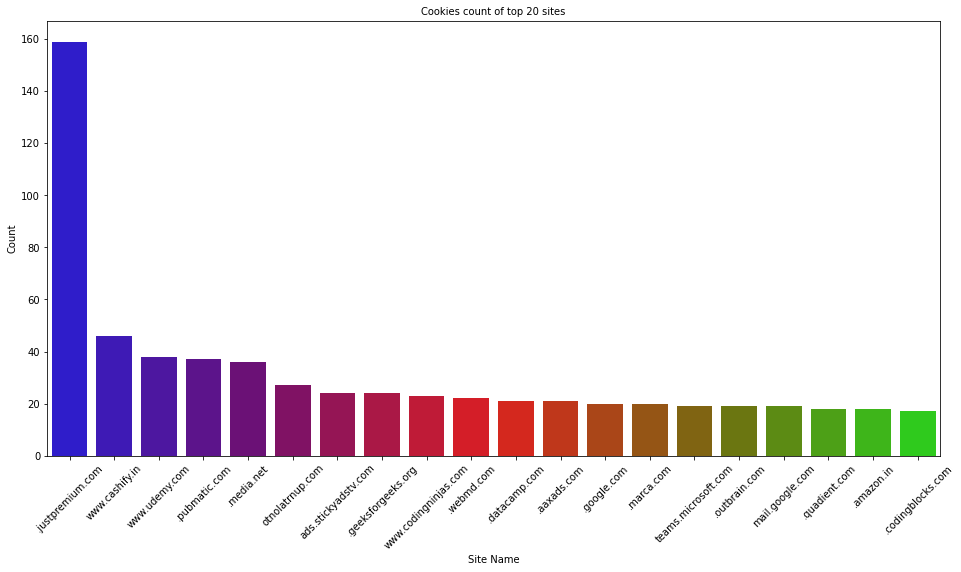

In [89]:
plt.figure(figsize = (16, 8))
# for label in (ax.get_xticklabels() + ax.get_yticklabels()):
# 	label.set_fontsize(26)
ax = sns.barplot(x='Name',y='Count',data=Cookie_count[:20], palette = 'brg'    )

ax.set_title(label = 'Cookies count of top 20 sites', fontsize = 10)
ax.set_xlabel(xlabel = 'Site Name', fontsize = 10)
ax.set_ylabel(ylabel = 'Count', fontsize = 10)
plt.xticks(rotation=45,fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

**Below Function will help us find time difference between cookie creation time and cookie expiry time, From there we can get the total duration of a cookie.**

In [132]:
def dtdiff(x,y):
  # x = datetime(x)
  # y = datetime(y)
  try:
    z = y-x
    x = str(z)
    x = x.split()
    x = int(x[0])
  except:
    return 0

  return x

In [91]:
data1

,host_key,is_secure,is_httponly,has_expires,is_persistent,priority,samesite,source_scheme,source_port,is_same_party,Created,Expires,Last Accessed
0,.microsoft.com,1,0,1,1,1,0,2,-1,0,2020-12-07 12:16:33.285322,2021-12-07 12:16:33.285322,2021-10-22 10:23:17.754791
1,www.office.com,1,0,1,1,1,0,2,-1,0,2020-12-07 12:16:33.288893,2021-12-07 12:16:33,2021-10-08 16:44:27.157167
2,.getadblock.com,0,0,1,1,1,-1,2,443,0,2020-12-07 12:16:47.699570,2023-04-06 04:47:44,2021-10-18 04:10:59.302260
3,.getadblock.com,0,0,1,1,1,1,2,443,0,2020-12-07 12:16:55.380626,2022-04-06 04:48:13,2021-10-18 04:10:59.302260
4,.visualstudio.com,0,0,1,1,1,-1,2,443,0,2020-12-07 15:02:46.335515,2022-08-19 12:29:57,2021-09-17 12:43:55.469456
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,.adnxs.com,1,1,1,1,1,0,2,443,0,2020-12-07 16:17:49.430935,2022-01-20 11:09:53.759549,2021-10-22 11:09:53.759549
3251,.web.whatsapp.com,1,0,0,0,1,-1,2,443,0,2021-10-22 11:10:08.739907,2021-12-07 12:16:33.285322,2021-10-22 11:10:08.739907
3252,.web.whatsapp.com,1,0,0,0,1,-1,2,443,0,2021-10-22 11:10:08.739907,2021-12-07 12:16:33.285322,2021-10-22 11:10:08.739907
3253,.google.com,0,0,1,1,2,-1,2,443,0,2021-10-22 11:12:00.457955,2022-10-22 11:12:00.457955,2021-10-22 11:12:00.457955


In [103]:
data1.iloc[1,11]

datetime.datetime(2021, 12, 7, 12, 16, 33)

In [138]:
data2 =[]
for i in range(0,3255):
  data2.append(dtdiff(data1.iloc[i,10],data1.iloc[i,11]))

In [139]:
data1['Duration'] = data2

In [141]:
data2 = data1.sort_values('Duration',ascending=False)

In [142]:
data2

,host_key,is_secure,is_httponly,has_expires,is_persistent,priority,samesite,source_scheme,source_port,is_same_party,Created,Expires,Last Accessed,Duration
412,app.wts2.one,1,0,1,1,1,0,2,443,0,2021-04-08 11:59:24.960240,2100-01-02 23:59:56.960240,2021-04-08 11:59:24.960240,28758
411,app.wts2.one,1,0,1,1,1,0,2,443,0,2021-04-08 11:59:24.960217,2100-01-02 23:59:56.960217,2021-04-08 11:59:24.960217,28758
410,app.wts2.one,1,0,1,1,1,0,2,443,0,2021-04-08 11:59:24.960194,2100-01-02 23:59:56.960194,2021-04-08 11:59:24.960194,28758
409,app.wts2.one,1,0,1,1,1,0,2,443,0,2021-04-08 11:59:24.960127,2100-01-02 23:59:56.960127,2021-04-08 11:59:24.960127,28758
1618,accounts.spotify.com,1,1,1,1,1,1,2,443,0,2021-09-29 06:45:02.821075,2089-10-17 09:59:09.821075,2021-09-29 06:45:02.821075,24855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,.www.geeksforgeeks.org,0,0,1,1,1,-1,2,-1,0,2020-12-30 08:01:39.512896,9999-12-31 12:00:00,2021-10-22 11:12:02.033917,0
3080,.docs.google.com,1,1,1,1,0,0,2,443,0,2021-10-22 10:19:48.263467,2021-10-22 11:19:48.263467,2021-10-22 10:19:48.263467,0
3068,.itnext.io,0,0,1,1,1,-1,2,443,0,2021-10-22 09:45:35.290671,2021-10-23 09:45:35,2021-10-22 11:10:23.028681,0
3158,pypi.org,1,1,1,1,1,1,2,443,0,2021-10-22 10:46:06.319903,2021-10-22 22:46:06.319903,2021-10-22 10:46:06.319903,0


In [146]:
data3 = data2.iloc[:,[0,13]]
data3

,host_key,Duration
412,app.wts2.one,28758
411,app.wts2.one,28758
410,app.wts2.one,28758
409,app.wts2.one,28758
1618,accounts.spotify.com,24855
...,...,...
232,.www.geeksforgeeks.org,0
3080,.docs.google.com,0
3068,.itnext.io,0
3158,pypi.org,0


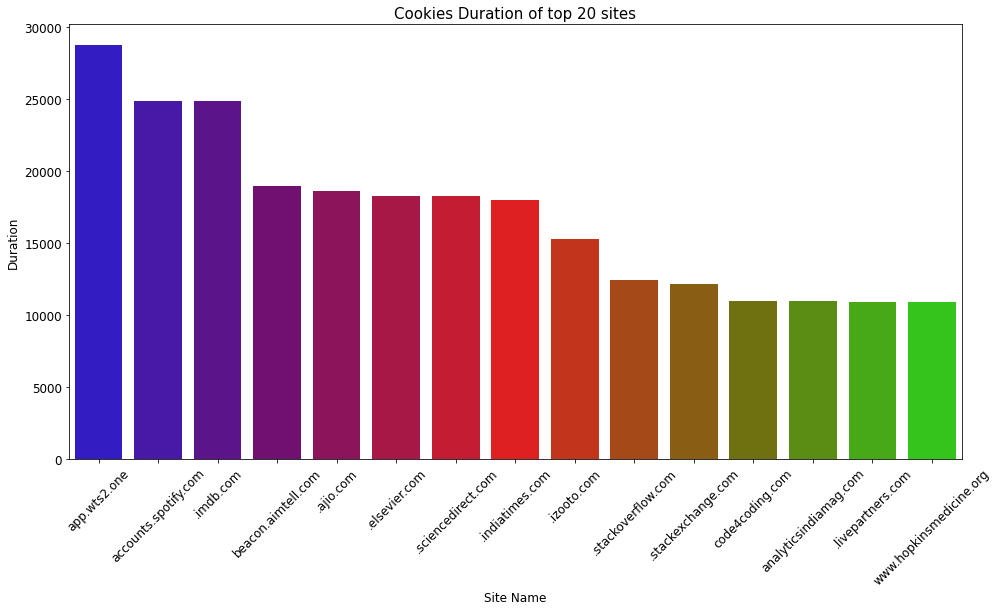

In [148]:
plt.figure(figsize = (16, 8))
# for label in (ax.get_xticklabels() + ax.get_yticklabels()):
# 	label.set_fontsize(26)
ax = sns.barplot(x='host_key',y='Duration',data=data3[:20], palette = 'brg'    )

ax.set_title(label = 'Cookies Duration of top 20 sites', fontsize = 15)
ax.set_xlabel(xlabel = 'Site Name', fontsize = 12)
ax.set_ylabel(ylabel = 'Duration', fontsize = 12)
plt.xticks(rotation=45,fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()